In [1]:
import pandas as pd
import pickle
import geopandas as gdp
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from shapely.geometry import Point, Polygon
import random
import numpy as np
import itertools
import sys
%matplotlib inline

In [2]:
#get map file
map_file='./data/TM_WORLD_BORDERS-0.3.shp'
map_plot=gdp.read_file(map_file)

In [225]:
#get coordinates of populations from both datasets
hgdp_coords=pickle.load(open("HGDP_pop_location.p",  "rb" ))
thou_coords=pickle.load(open("thou_pop_location.p",  "rb" ))
h_x,h_y=[[i for i,j in hgdp_coords.values()], [j for i,j in hgdp_coords.values()]]
t_x,t_y=[[i for i,j in thou_coords.values()], [j for i,j in thou_coords.values()]]


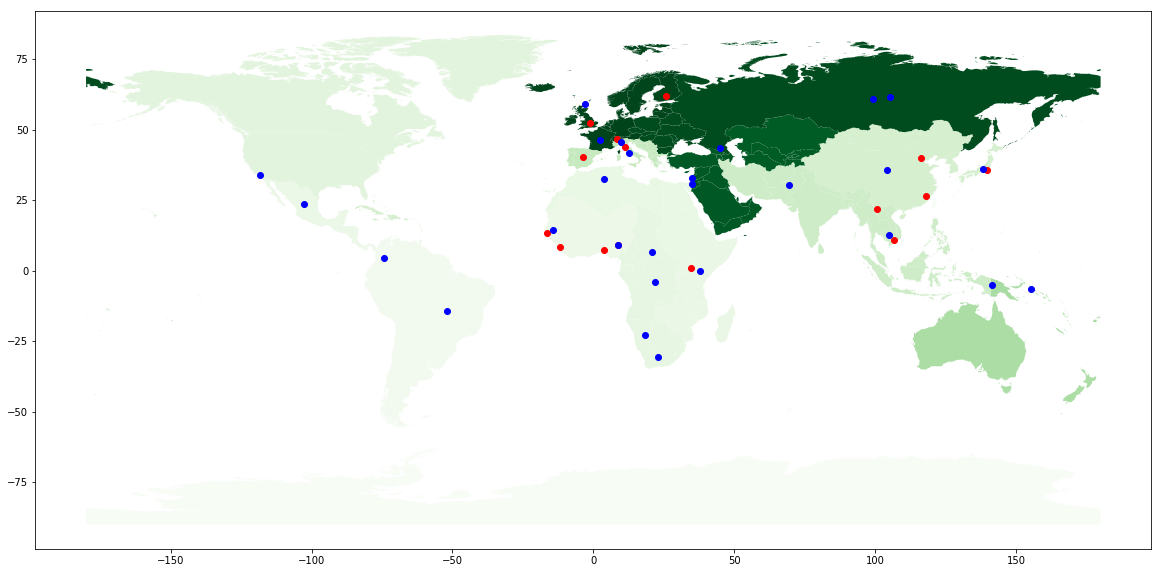

In [41]:
fig, ax = plt.subplots(1, figsize=(20, 20))
map_plot.plot(column='SUBREGION', cmap= 'Greens', linewidth=0.8, ax=ax)
#Here the points are added, color and size can be modified
ax.scatter(t_y,t_x, color='red')
ax.scatter(h_y,h_x, color='blue')

In [66]:
#Now lets plot arc for one thousand genome label
confu_mat=np.load('./classification_data/mat_1000GxHGDP_fold0.npz')
#unpacking
hgdp_pop=confu_mat['hgdp_pop']
matrix=confu_mat['matrix']
thou_pop=confu_mat['thousand_pop']

In [213]:
matrix.sum(axis=0).max()
print(thou_pop[8])
matrix[:,1].shape
x=[hgdp_coords[hgdp_pop[idx]]for idx,j in enumerate(matrix[:,10]) if j !=0 ]
print(x)
print(sum([i for i, j in x]))


TSI
[(61.01370970000001, 99.1966559), (30.375321, 69.34511599999999), (35.86166, 104.195397), (-5.0122202, 141.3470159), (23.634501, -102.552784), (4.570868, -74.297333), (-14.235004, -51.92528)]
136.2088355


In [87]:
thou_coords[thou_pop[10]]#Get coordinates of 10th column in confusion matrix 

(39.90419989999999, 116.4073963)

In [222]:
def avg(ls):
    return sum(ls)/len(ls)

def arcs_for_pop(ax,thou_coords,hgdp_coords, thou_pop,hgdp_pop,matrix,thou_popIdx=10):#Get coordinates of 10th column in confusion matrix ):
    #get coordinates for destination (thou pop)
    destination_coords=thou_coords[thou_pop[thou_popIdx]][1],thou_coords[thou_pop[thou_popIdx]][0]
    #loop over line to determine points to include 
    origin_coords=[(hgdp_coords[hgdp_pop[idx]][1],hgdp_coords[hgdp_pop[idx]][0]) for idx,j in enumerate(matrix[:,thou_popIdx]) if j !=0 ]
    #calculate centroid
    centro_x=avg([i for i, j in origin_coords])
    centro_y=avg([j for i, j in origin_coords])
    #get bezier lines loop 
    arcs=[calculate_bezier(destination_coords, i, (centro_x,centro_y)) for i in origin_coords ]
    #get proportions of classifications
    non_nul=[j for j in matrix[:,10] if j !=0]
    arr_nonull=np.array(non_nul)
    arr_nonull=arr_nonull/arr_nonull.sum()
    print(arr_nonull)
    
    #plot lines with width normalized over possible paths 
    for idx,i in enumerate(arcs):
        ax.plot(i[0],i[1], linewidth=arr_nonull[idx]*15,c=(random.uniform(0.5, 1),random.uniform(0.5, 1),0,1))
    #plot points
    origin_coords.append(destination_coords)
    ax.scatter([i for i,j in origin_coords], [j for i,j in origin_coords], marker='o', s=70, c='r')
    ax.set(aspect=1)
    
    
def calculate_bezier(p_1,p_2,p_inter):
    x1,y1 =p_1
    x2, y2 =p_2
    xb,yb=  p_inter
    print(p_inter)
    xb,yb= xb-10,yb +45
    bezier_path = np.arange(0, 1.01, 0.01) 
    x = (1 - bezier_path)** 2 * x1 + 2 * (1 - bezier_path) * bezier_path * xb + bezier_path** 2 * x2
    y = (1 - bezier_path)** 2 * y1 + 2 * (1 - bezier_path) * bezier_path * yb + bezier_path** 2 * y2
    return x,y 
    

(12.59000348571428, 37.00556434285715)
(12.59000348571428, 37.00556434285715)
(12.59000348571428, 37.00556434285715)
(12.59000348571428, 37.00556434285715)
(12.59000348571428, 37.00556434285715)
(12.59000348571428, 37.00556434285715)
(12.59000348571428, 37.00556434285715)
[0.1        0.10833333 0.55416667 0.00833333 0.06666667 0.03333333
 0.12916667]


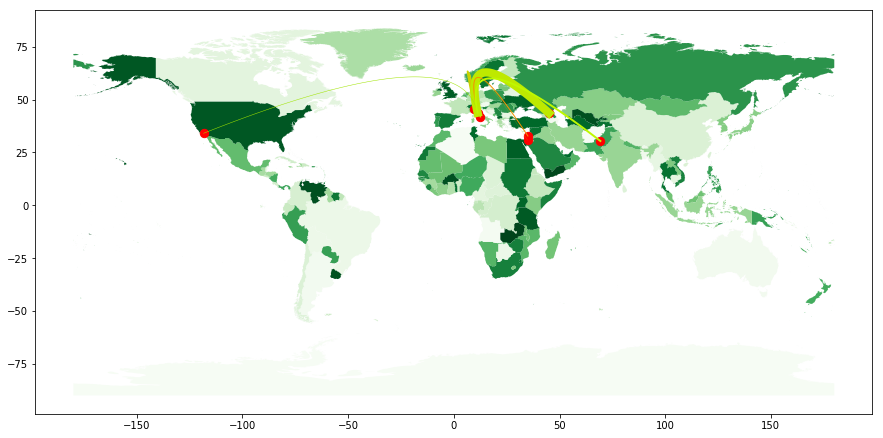

In [223]:
#First plot world map
fig, ax = plt.subplots(figsize=(15,15))
map_plot.plot(column='UN', cmap= 'Greens', linewidth=0.8, ax=ax)
arcs_for_pop(ax,thou_coords,hgdp_coords,thou_pop,hgdp_pop,matrix,thou_popIdx=8) #inverting coordinates here but not ideal
